Description:
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.

The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded here.

The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

#Import necessary libraries 

In [2]:
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
!pip install -U prettytable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install imblearn
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from imblearn.combine import SMOTETomek

In [8]:
from mlxtend.plotting import plot_confusion_matrix

In [9]:
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score

In [10]:
#Loading dataset 
df=pd.read_csv("https://raw.githubusercontent.com/webstormuser/ML/main/CENSUS_INCOME%20_CLASSIFICATION/adult.csv")

Step 1: Descriptive analysis

In [11]:
#top 5 rows 
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
#bottom 5 rows 
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
27244,58,Private,205410,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
30474,38,State-gov,255191,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
9363,22,Private,117210,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,Greece,<=50K
3514,36,?,216256,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,3464,0,30,United-States,<=50K
10802,38,Self-emp-inc,159179,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K


In [14]:
#finding shape of dataframne
df.shape

(32561, 15)

In [15]:
#Numeric Features :
Numeric_Features=[col for col in df.columns if df[col].dtypes!='O']
Numeric_Features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [16]:
Categorical_Features=[col for col in df.columns if df[col].dtypes=='O']
Categorical_Features

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [17]:
#finding duplicate records insdie dataframe 
df.duplicated().sum()

24

In [18]:
#drop duplicates 
df.drop_duplicates(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education.num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital.gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital.loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [21]:
#dataframe showing 0 null values since we have some data missing in the form of ? lets find %of data having missing values in ?
# Check for null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [22]:
# Check for '?' in dataset
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [23]:
df.replace({'?':np.NaN},inplace=True)

In [24]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [25]:
#We have missing data in workclass,occupation and native.country column

In [26]:
#Chekcing the distribution of our target feature our target feature is income 
df['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

Observation :It is clearly visible our dataset is imbalanced we have to handle it 

Step 2: Exploratory Data Analysis

Text(0.5, 1.0, 'Cardinality')

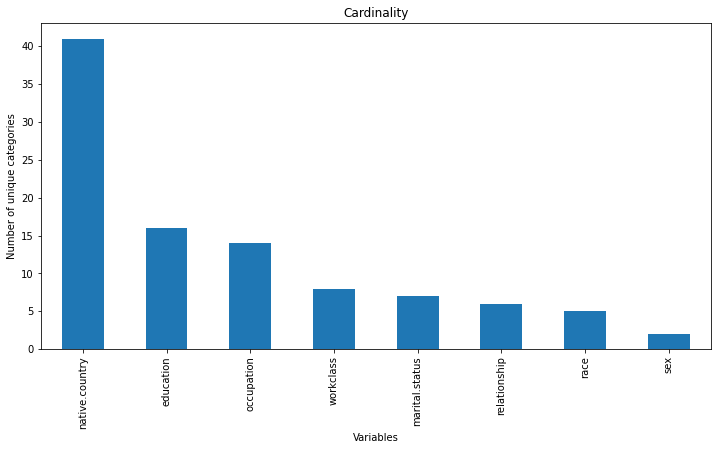

In [27]:
#Finding the cardinality of categorical Features inside dataframe
df[['workclass','education','marital.status','occupation','relationship','race','sex','native.country']].nunique().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

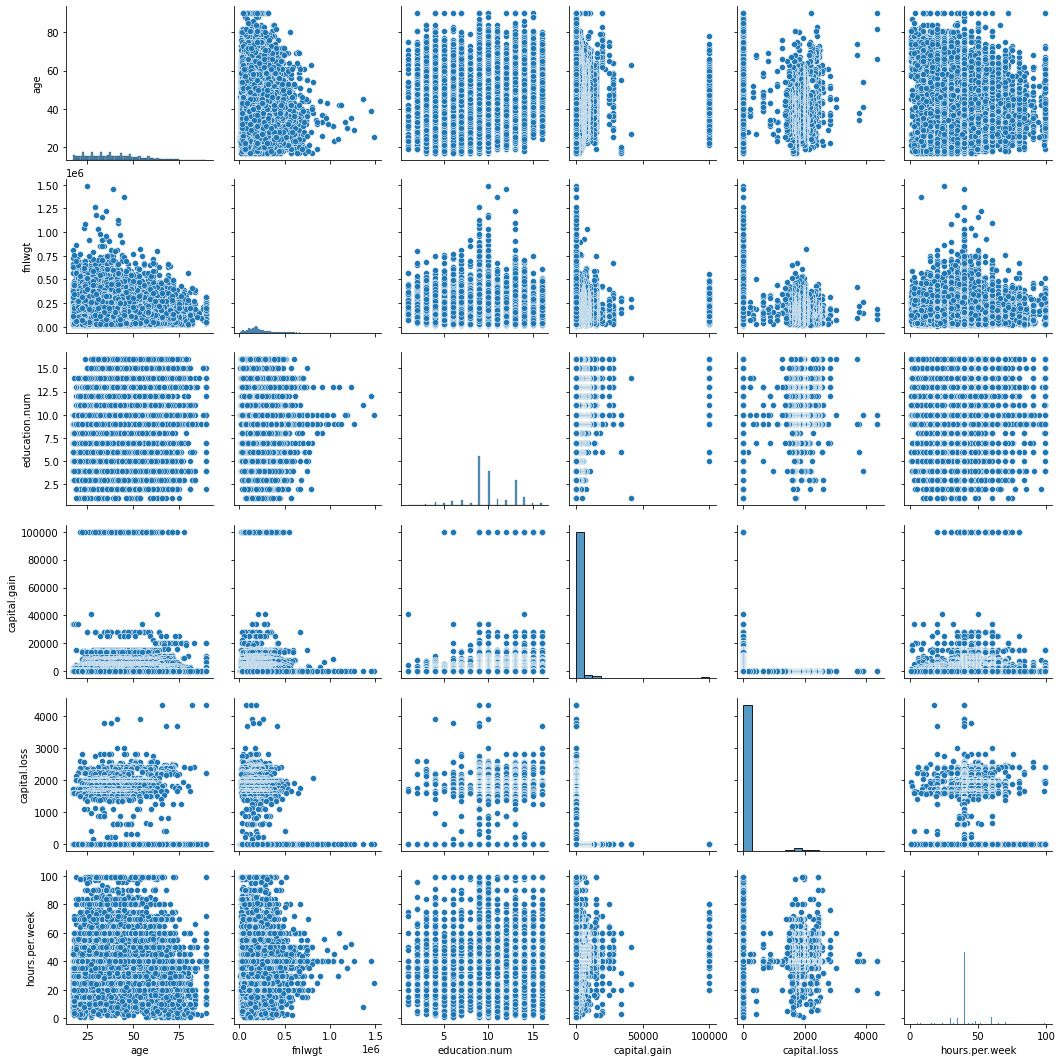

In [28]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc566307c0>,
      dtype=object)

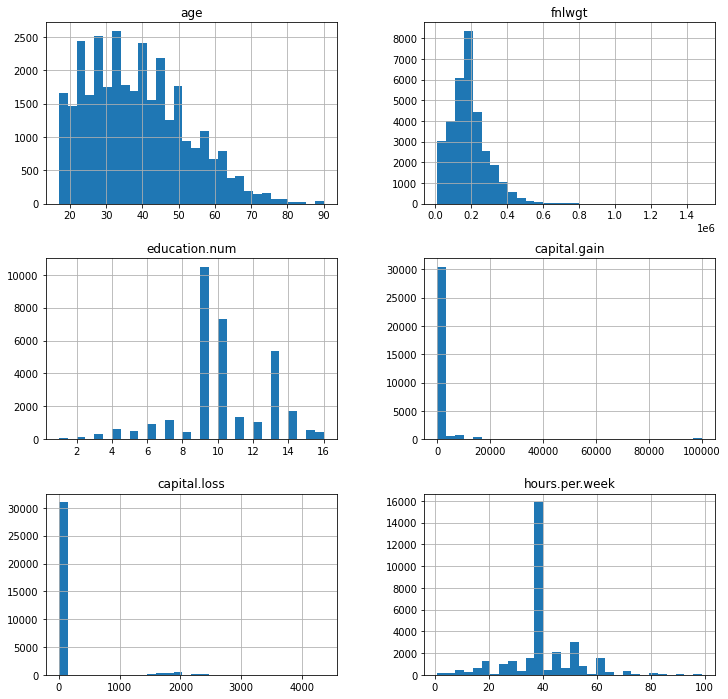

In [29]:
#lets see the univariate analysis 
#Finding the normal distribution of Numerical Features inside the dataframe 
df.hist(bins=30, figsize=(12,12))

In [30]:
#our numeric features are not normely distributed .Since we are dealing with classification problem we will not take care about it 

Workclass Distribution :


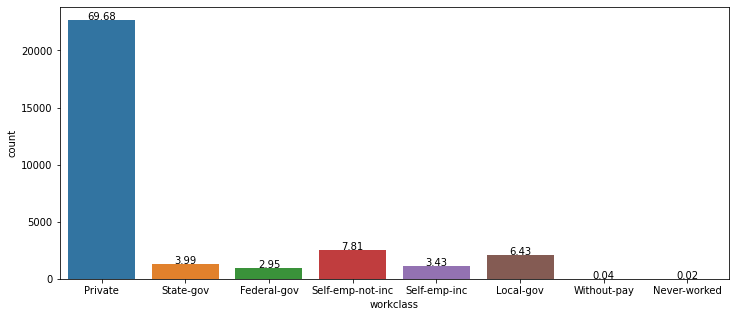

In [31]:
plt.figure(figsize=(12,5))
total = float(len(df['income']) )
ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Obsearvation:from workclass without pay and nevwer worked make no sense we can drop them

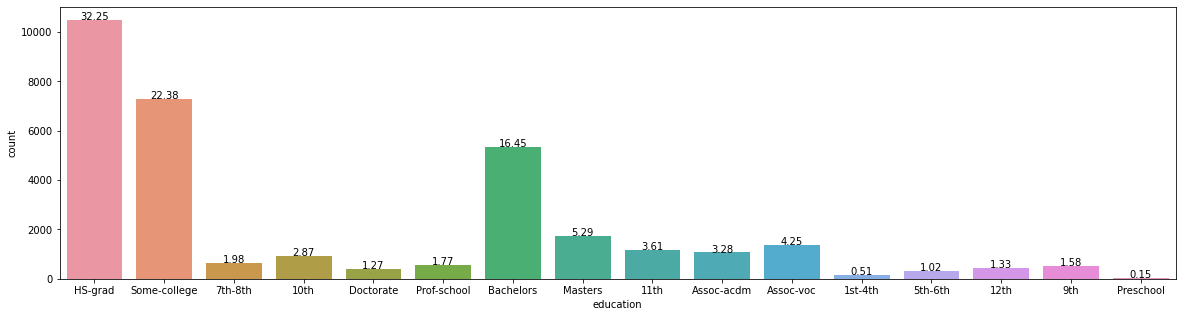

In [32]:
plt.figure(figsize=(20,5))
total = float(len(df['income']) )
ax = sns.countplot(x="education", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

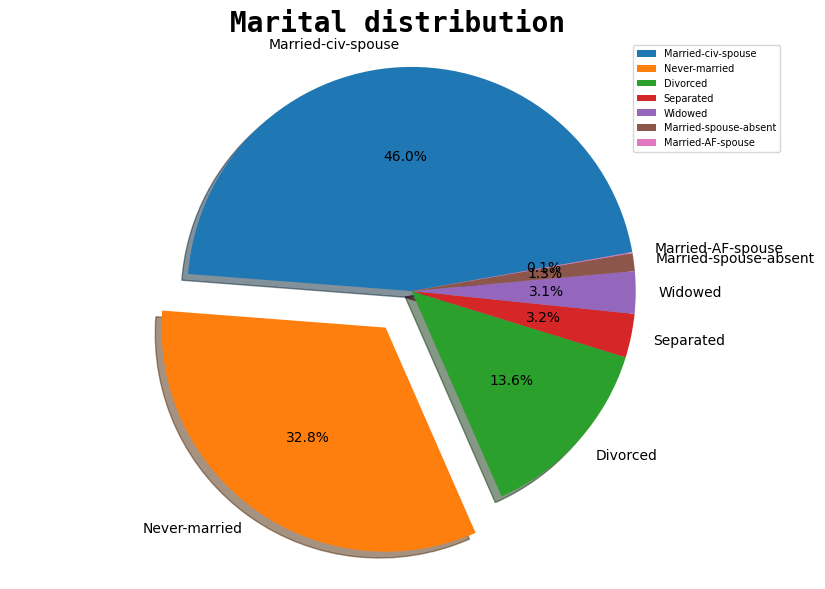

In [33]:
# Creating a pie chart for 'Marital status'
marital = df['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

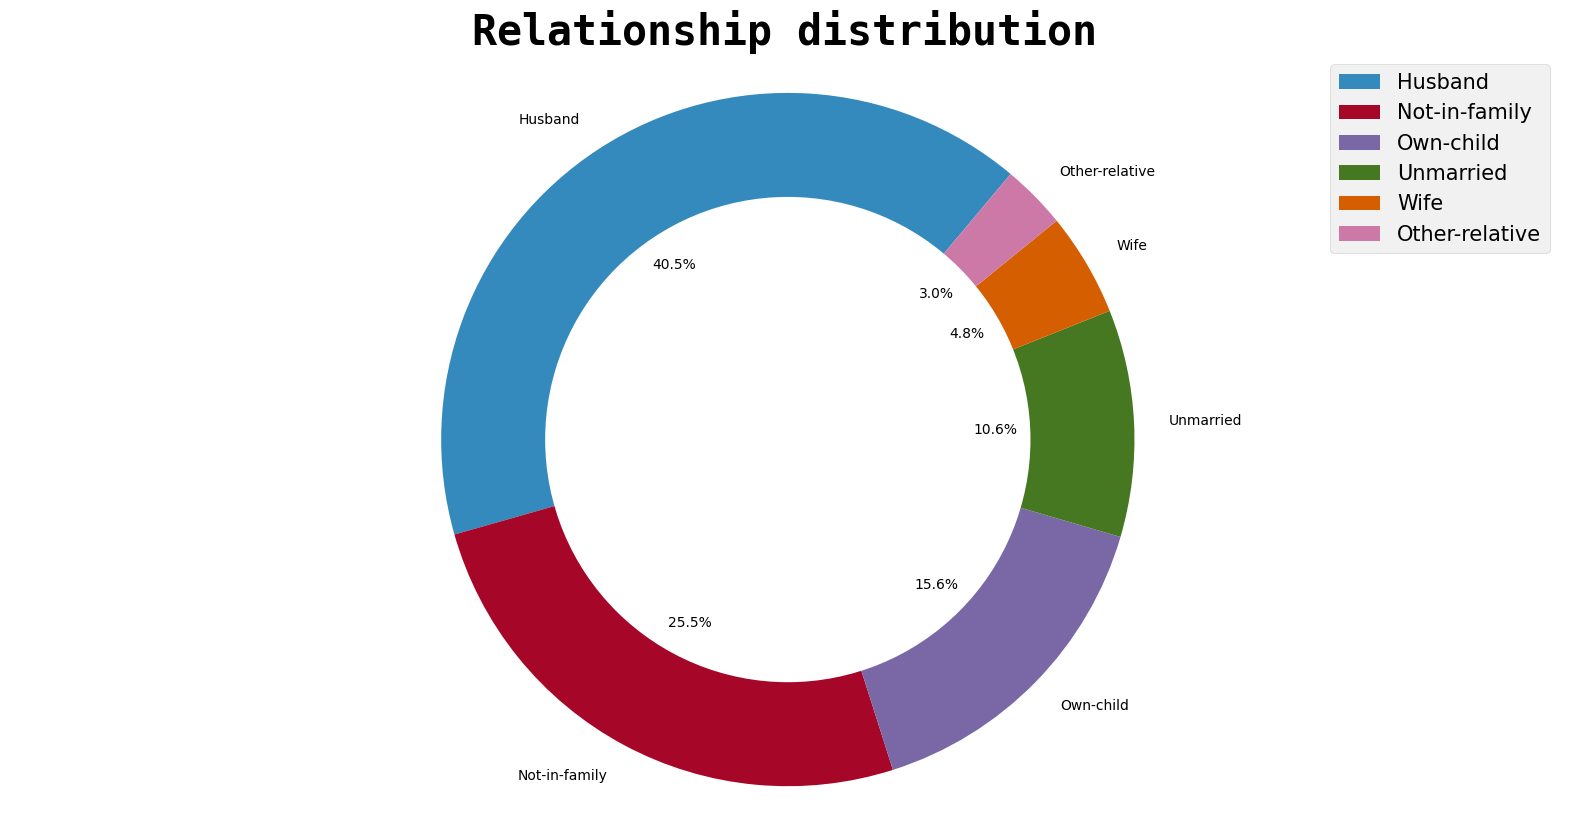

In [34]:
# Creating a donut chart for 'Age'
relation = df['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

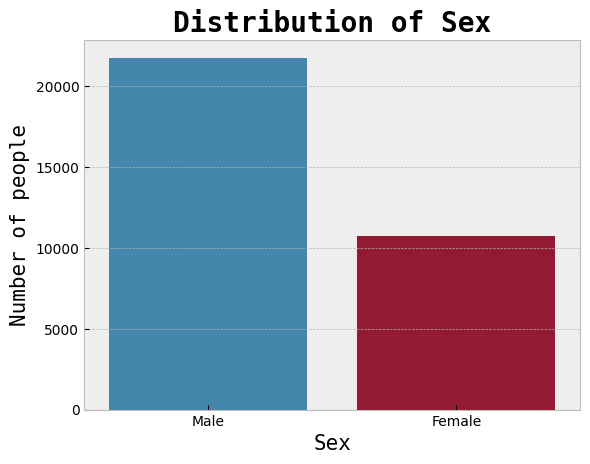

In [35]:
# Creating a barplot for 'Sex'
sex = df['sex'].value_counts()
sns.barplot(x=sex.index,y=sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)

In [36]:
#!pip install sqarify

Obesravation :In race distribution we have majority of White and Blck category

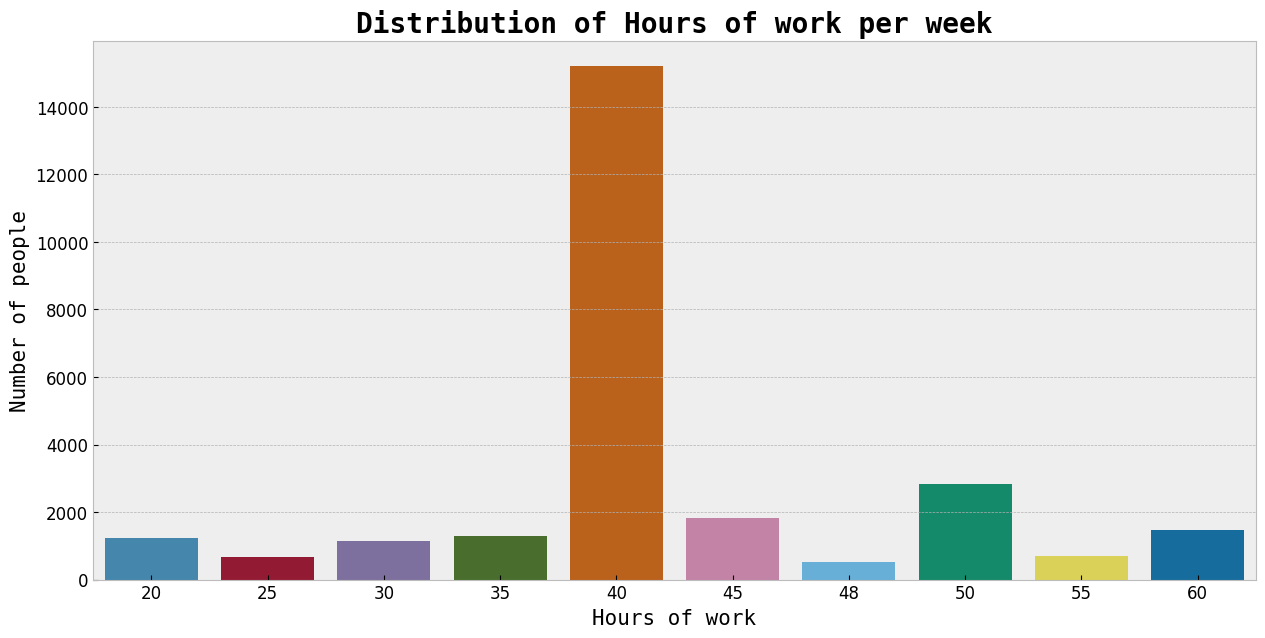

In [37]:
# Creating a barplot for 'Hours per week'
hours = df['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index, y=hours.values)
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Bivariate Analysis:

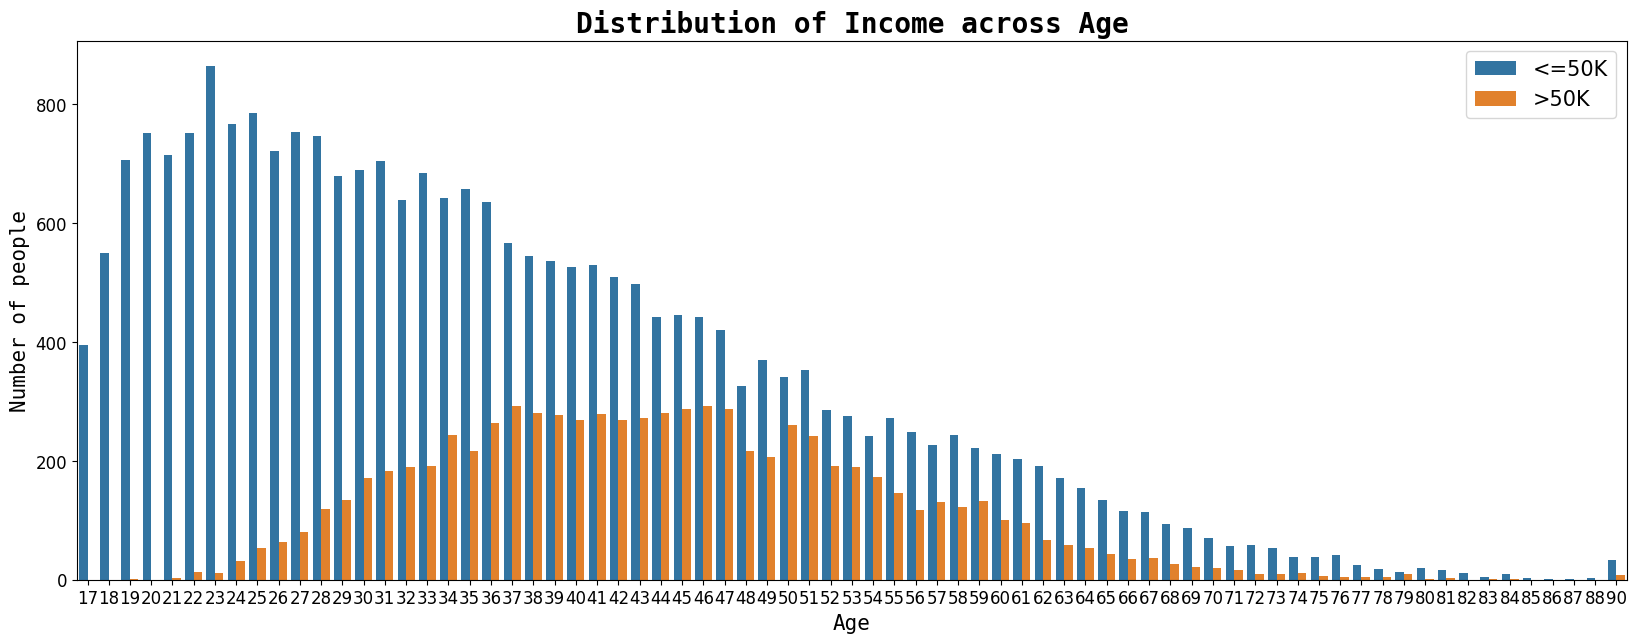

In [38]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

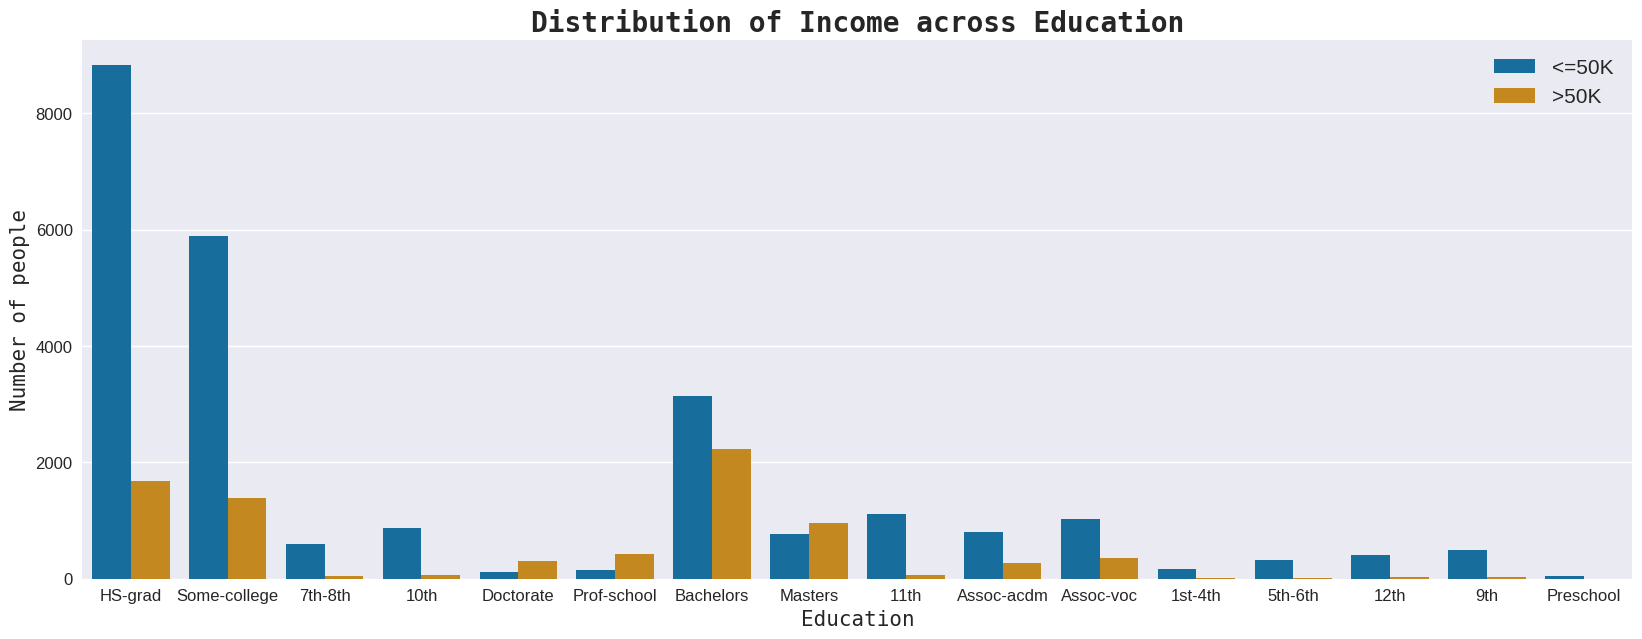

In [39]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['education'],
              hue=df['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

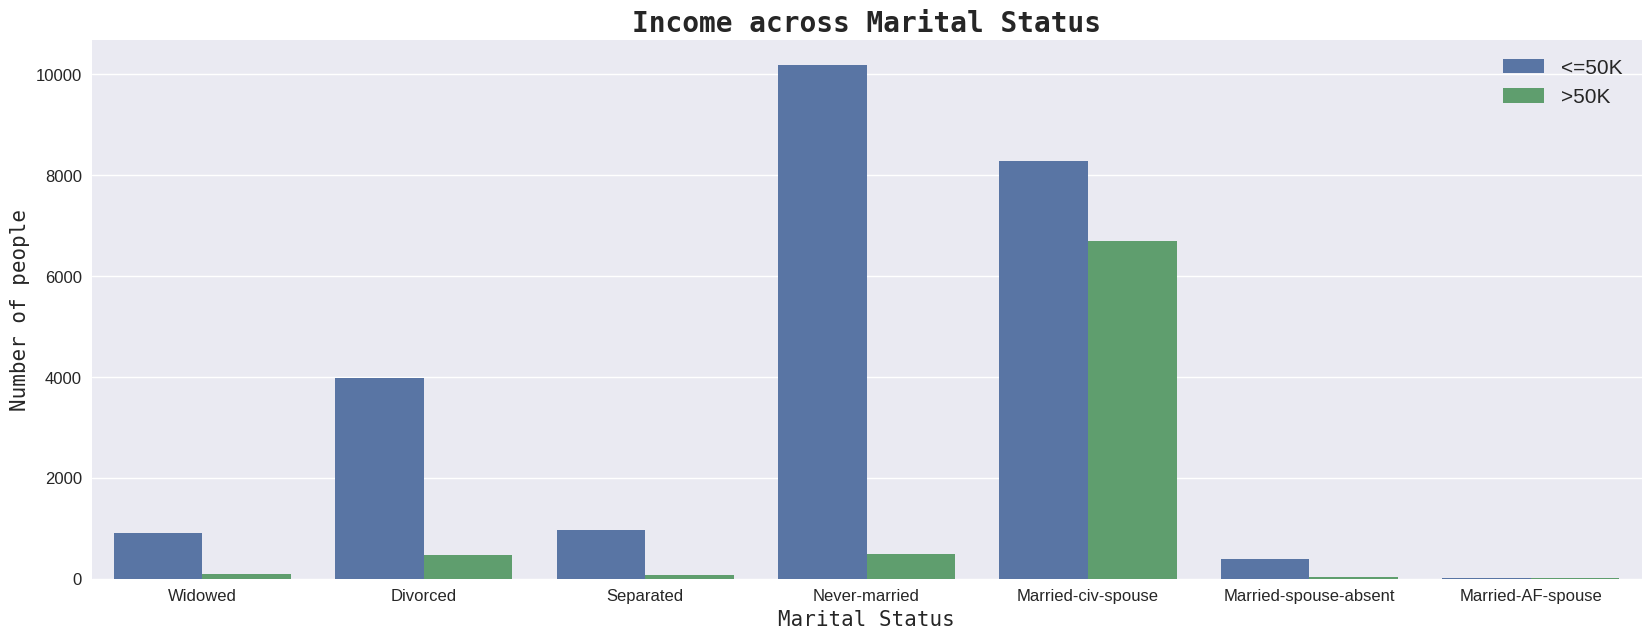

In [40]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['marital.status'], hue=df['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

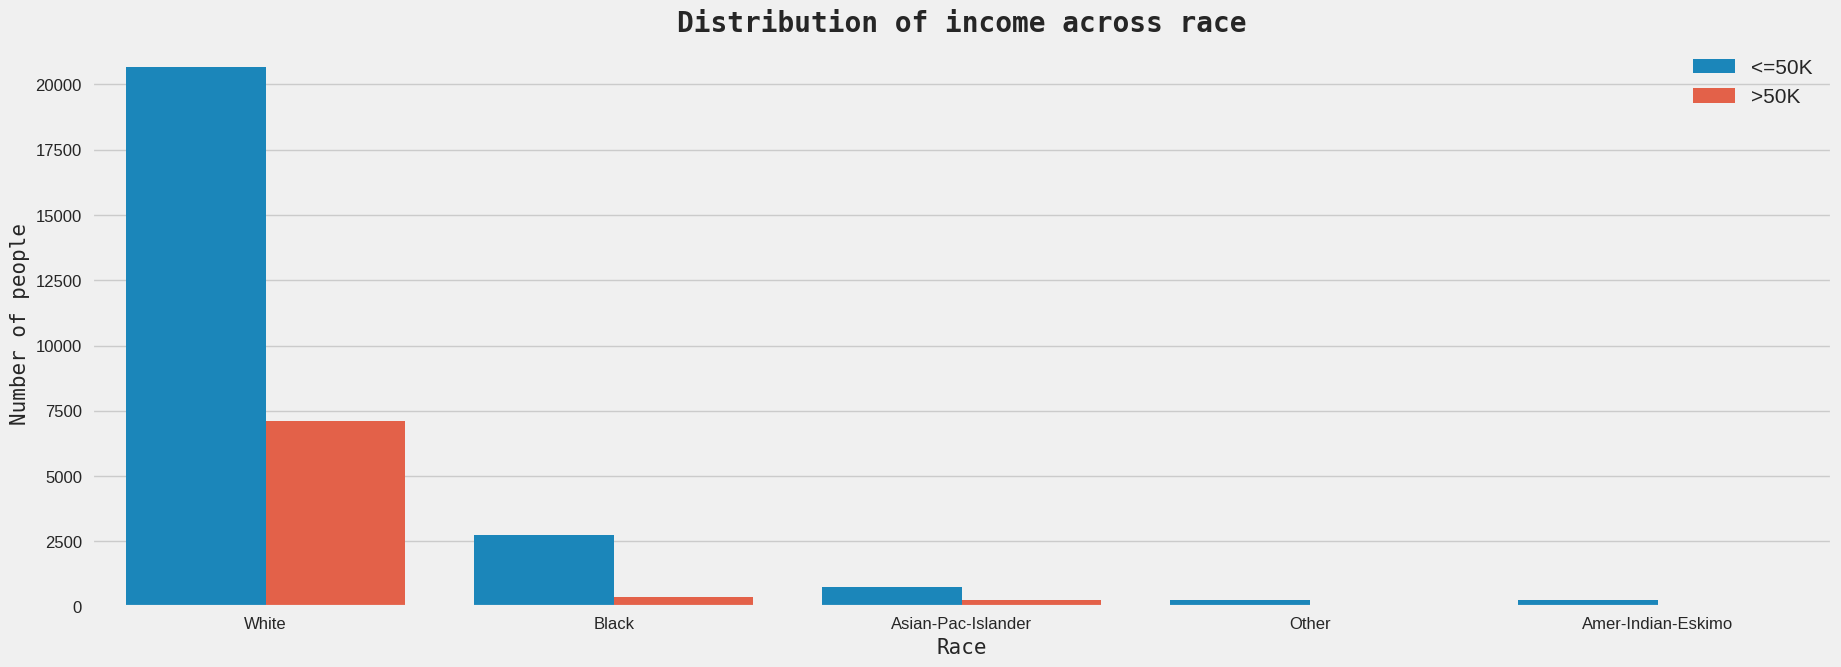

In [41]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['race'], hue=df['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


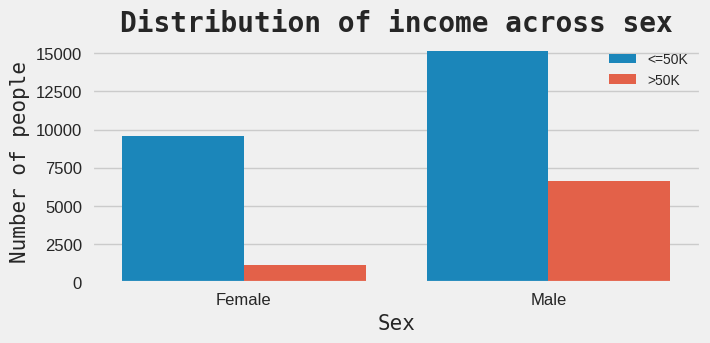

In [42]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(x=df['sex'], hue=df['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()


Multivariate Analusis:

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
df['income'] = le.fit_transform(df['income'])

In [45]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education.num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital.gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital.loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
hours.per.week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
income,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


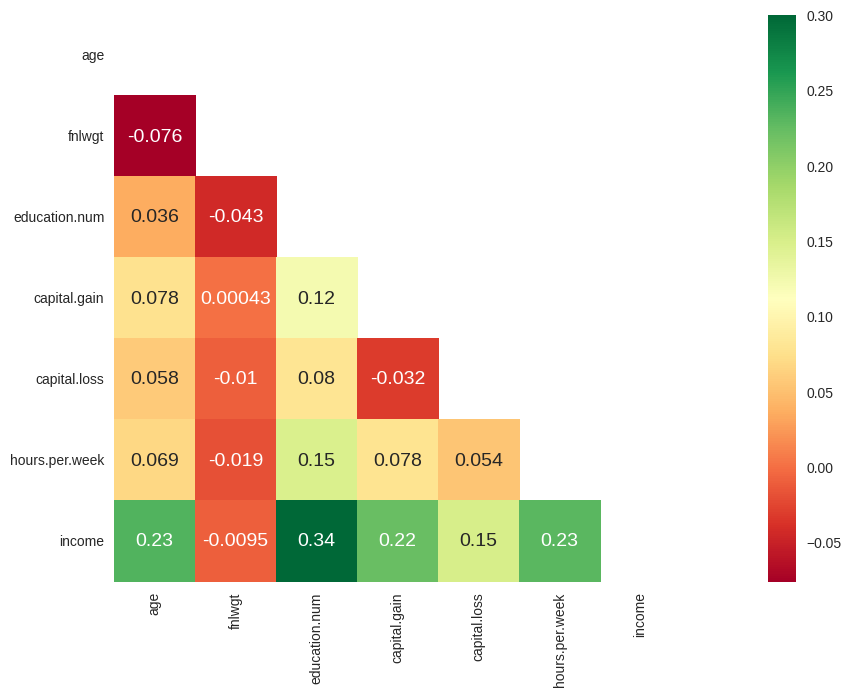

In [46]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 7))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

Data Preprocessing:

In [47]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [48]:
df.isna().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     582
age                  0
fnlwgt               0
education            0
education.num        0
marital.status       0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [49]:
df.to_csv("clean_dataset.csv")

FEATURE ENGINEERING 

In [50]:
df=pd.read_csv("clean_dataset.csv")

In [51]:
df=df.drop('Unnamed: 0',axis=1)

In [52]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [53]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [54]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [55]:
#Replacing  overall status of marital.status to single or married
df.replace(to_replace=df['marital.status'].unique(),
           value = ['single','married','single','single','single','married','single'], inplace=True)

In [56]:
gain_or_loss = np.zeros(len(df))
gain_or_loss

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
# creating a new feature gain/loss

gain_or_loss = np.zeros(len(df))
gain_index = df[df['capital.gain'] != 0].index
loss_index = df[df['capital.loss'] != 0].index
for index in gain_index:
    gain_or_loss[index] = 1
for index in loss_index:
    gain_or_loss[index] = -1
    
df['gain/loss'] = gain_or_loss.astype(int)

In [58]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,gain/loss
0,90,NaN,77053,HS-grad,9,single,NaN,Not-in-family,White,Female,0,4356,40,United-States,0,-1
1,82,Private,132870,HS-grad,9,single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,-1


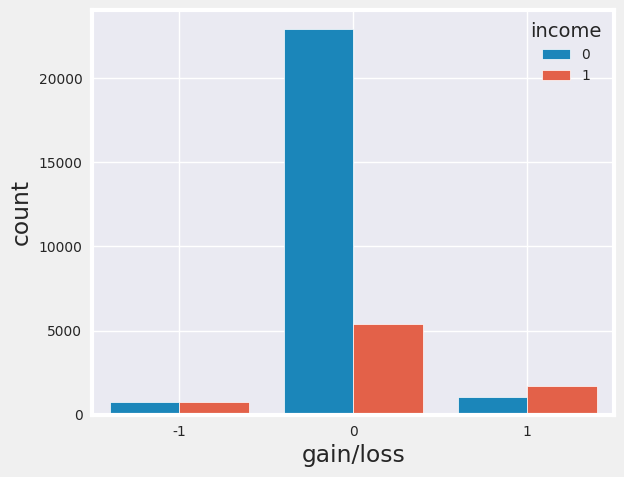

In [59]:
# Analysing salary with respect to gain/loss column
plt.figure(figsize = (6,5))
sns.set_style(style = 'darkgrid')
sns.countplot(x = 'gain/loss', hue = 'income', data = df)
plt.grid(True)

In [60]:
# We observe that higher the degree of a person, higher is the education_num
# So we need not do any Label Encoding here, as ranks are already assigned in the desired format
# Creating a dataframe to know which rank belongs to which degree
df_education_labels = df.groupby(by = 'education').describe()['education.num']['mean'].sort_values().reset_index()
df_education_labels

,education,mean
0,Preschool,1.0
1,1st-4th,2.0
2,5th-6th,3.0
3,7th-8th,4.0
4,9th,5.0
5,10th,6.0
6,11th,7.0
7,12th,8.0
8,HS-grad,9.0
9,Some-college,10.0


In [61]:
# Naming education_num as education_rank

df.rename(columns = {'education.num': 'education_rank'}, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_rank,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,gain/loss
0,90,NaN,77053,HS-grad,9,single,NaN,Not-in-family,White,Female,0,4356,40,United-States,0,-1
1,82,Private,132870,HS-grad,9,single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,-1
2,66,NaN,186061,Some-college,10,single,NaN,Unmarried,Black,Female,0,4356,40,United-States,0,-1
3,54,Private,140359,7th-8th,4,married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,-1
4,41,Private,264663,Some-college,10,single,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,-1


In [62]:
# displaying unique countries with value counts in percentage
df['native.country'].value_counts(normalize = True)*100

United-States                 91.231419
Mexico                         1.999687
Philippines                    0.619621
Germany                        0.428728
Canada                         0.378657
Puerto-Rico                    0.356752
El-Salvador                    0.331716
India                          0.312940
Cuba                           0.297293
England                        0.281646
Jamaica                        0.253481
South                          0.250352
China                          0.234705
Italy                          0.228446
Dominican-Republic             0.219058
Vietnam                        0.209670
Guatemala                      0.194023
Japan                          0.194023
Poland                         0.187764
Columbia                       0.184635
Taiwan                         0.159599
Haiti                          0.137694
Iran                           0.134564
Portugal                       0.115788
Nicaragua                      0.106400


In [63]:
# naming less frequent countries as others (having value counts less than 0.3% of total values)
percentage_threshold = 0.3
arr_others = df['native.country'].value_counts()[df['native.country'].value_counts(normalize=True)*100 < percentage_threshold].index
df['native.country'].replace(to_replace=arr_others, value = ['others']*len(arr_others), inplace=True)

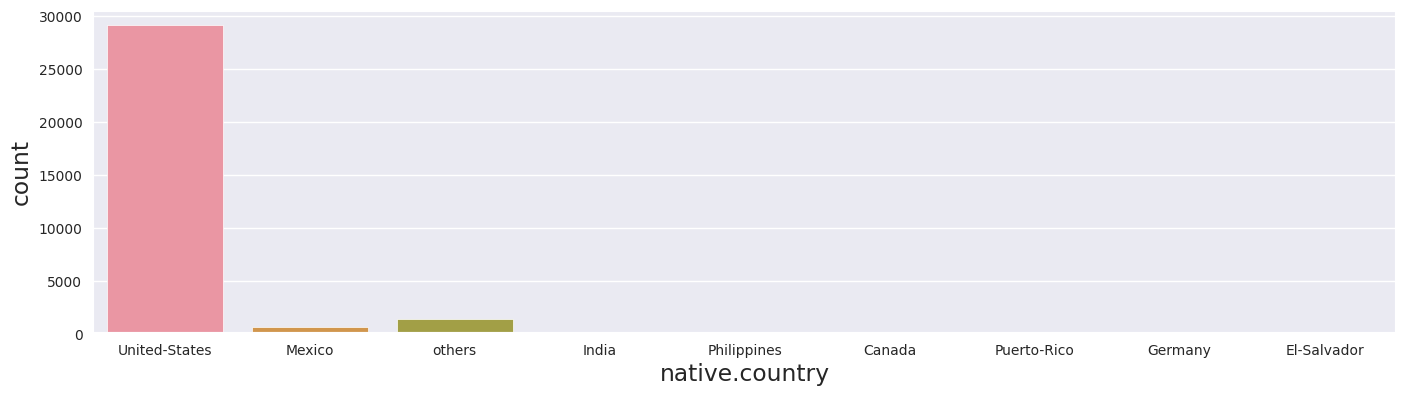

In [64]:
plt.figure(figsize = (15,4))
sns.countplot(x= 'native.country', data = df)

In [65]:
arr_others = df['workclass'].value_counts(normalize=True)[df['workclass'].value_counts(normalize=True)*100 < 2].index
df.replace(to_replace = arr_others, value = ['others']*len(arr_others), inplace = True)

In [66]:
df['workclass'].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'others'], dtype=object)

In [67]:
df['occupation'].unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

Splitting data set into target and features 

In [68]:
df.head()

,age,workclass,fnlwgt,education,education_rank,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,gain/loss
0,90,NaN,77053,HS-grad,9,single,NaN,Not-in-family,White,Female,0,4356,40,United-States,0,-1
1,82,Private,132870,HS-grad,9,single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,-1
2,66,NaN,186061,Some-college,10,single,NaN,Unmarried,Black,Female,0,4356,40,United-States,0,-1
3,54,Private,140359,7th-8th,4,married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,-1
4,41,Private,264663,Some-college,10,single,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,-1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_rank  32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  31955 non-null  object
 14  income          32537 non-null  int64 
 15  gain/loss       32537 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 4.0+ MB


In [70]:
df=df.drop(columns=['fnlwgt','education'],axis=1)

In [71]:
#Since we have merge capital.gain and capital.loss into gain/loss feature we can drop capital.gain and capital.loss 
df=df.drop(columns=['capital.gain','capital.loss'],axis=1)

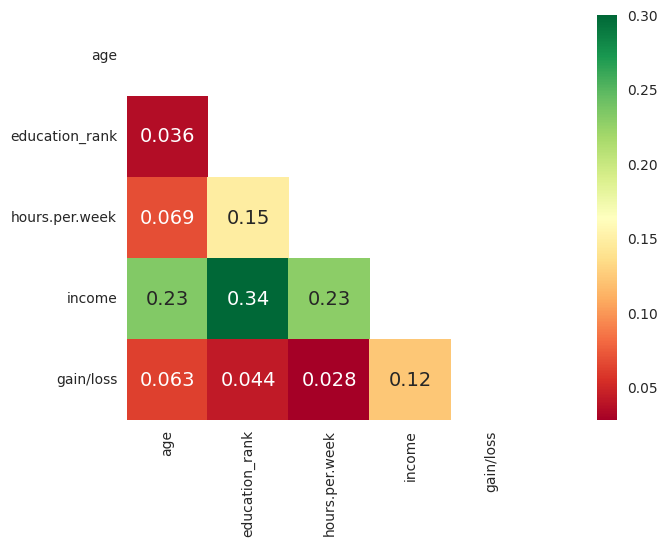

In [72]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

In [73]:
Numeric_Features=[col for col in df.columns if df[col].dtypes!='O']
Numeric_Features

['age', 'education_rank', 'hours.per.week', 'income', 'gain/loss']

In [74]:
Categorical_Features=[col for col in df.columns if df[col].dtypes=='O']
Categorical_Features

['workclass',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [75]:
features = df.columns.tolist()
features

['age',
 'workclass',
 'education_rank',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'hours.per.week',
 'native.country',
 'income',
 'gain/loss']

In [76]:
target = 'income'
features = df.columns.tolist()
features.remove(target)
X = df[features]
y = df[target]

In [77]:
X.shape

(32537, 11)

In [78]:
y.shape

(32537,)

In [79]:
num_features=[ col for col in X.columns if X[col].dtypes!='O']
cat_features=[ col for col in X.columns if X[col].dtypes=='O']
print(num_features)
print(cat_features)


['age', 'education_rank', 'hours.per.week', 'gain/loss']
['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


EXPERIMENT 1:

In [80]:
#Pipeline 1 use of Robust scaler to numeric_features and onehot encoder to categorical Features
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Other')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [81]:
X_scaled_Standard=preprocessor.fit_transform(X)

In [82]:
from imblearn.combine import SMOTETomek

In [83]:
smt=SMOTETomek(random_state=42,n_jobs=-1)

In [84]:
X_result1,y_result1=smt.fit_resample(X_scaled_Standard,y)

In [85]:
def drawRocCurve(classifier, nameClassifier, X_test, y_test):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = classifier.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('Random model: ROC AUC=%.3f' % (ns_auc))
    print(f'{nameClassifier}: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random model')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=nameClassifier)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return lr_auc, lr_fpr, lr_tpr

In [86]:
def GridSearch(param, estimator, X=X, y=y):
    '''GridSearch function split the data for training and test sets; fit data 
    for a given model and choose the best paramethers using GridSearchCV from sklearn.
    At the end this function return score raport for the prediction'''
    # split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    grid_rf = GridSearchCV(estimator, param, refit = True, verbose = 3, n_jobs=-1) 

    # fitting the model for grid search 
    grid_rf.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid_rf.best_params_) 
    grid_rf_predictions = grid_rf.predict(X_test) 

    # print classification report 
    return classification_report(y_test, grid_rf_predictions)

In [87]:
def ConfusionMatrix(classifier, X=X, y=y, confusionMatrix = True, plotConfusionMatrix = True):
        '''ConfusionMatrix function split data, fit data to model and give 
        a prediction for a given model and data. After that draw Confusion Matrix or 
        Plot Confusion Matrix to show the score'''
        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test,y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
            plot_confusion_matrix(classifier, X_test, y_test)  
            plt.show() 

In [88]:
from sklearn.model_selection import GridSearchCV

LogisticRegression:

model score: 0.837


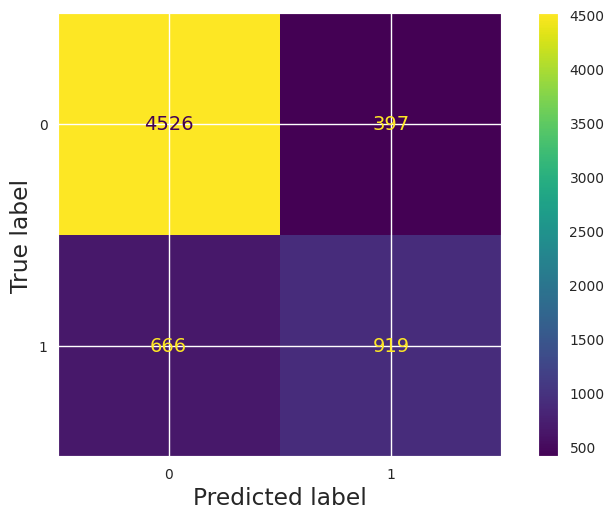

In [89]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  LogisticRegression())])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

In [90]:
from mlxtend.plotting import plot_confusion_matrix

In [91]:
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score


Random model: ROC AUC=0.500
Logistic Regression: ROC AUC=0.887


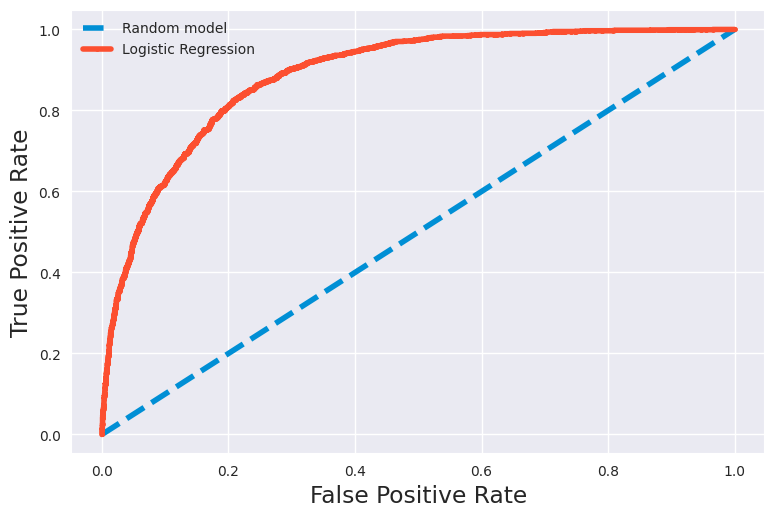

In [92]:
lr_auc_logr, lr_fpr_logr, lr_tpr_logr = drawRocCurve(clf, "Logistic Regression", X_test, y_test)

RandomForestClassifier:

model score: 0.821


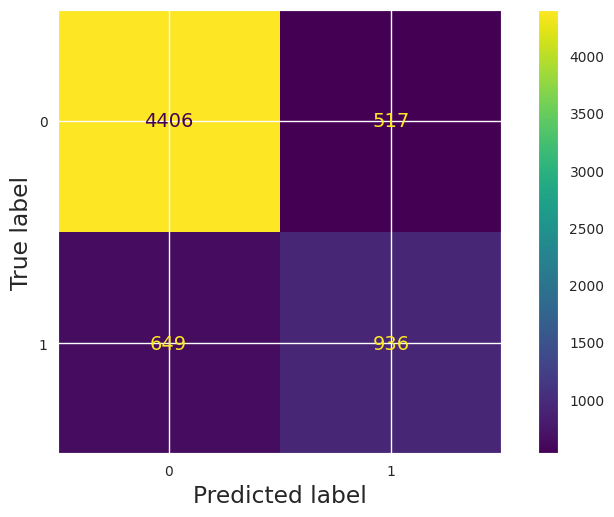

In [93]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  RandomForestClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
Random Forest: ROC AUC=0.872


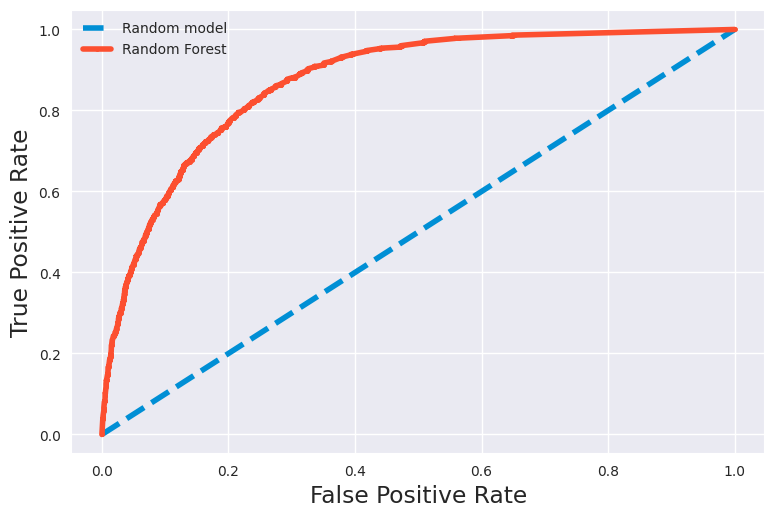

In [94]:
lr_auc_rf, lr_fpr_rf, lr_tpr_rf = drawRocCurve(clf, "Random Forest", X_test, y_test)

DecisionTreeClassifier:

model score: 0.787


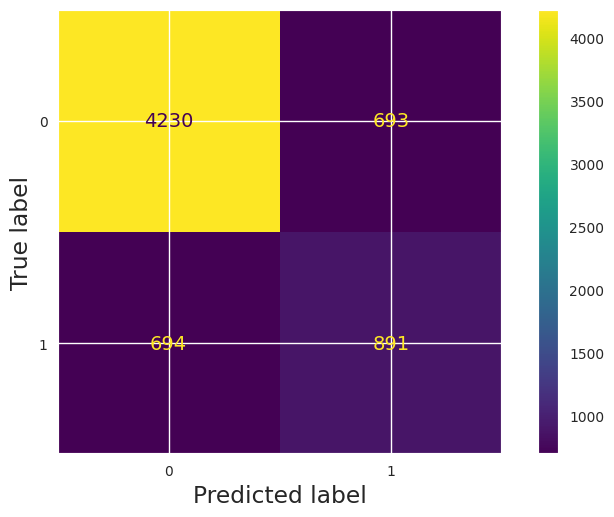

In [95]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  DecisionTreeClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
Decion Tree Classifier: ROC AUC=0.729


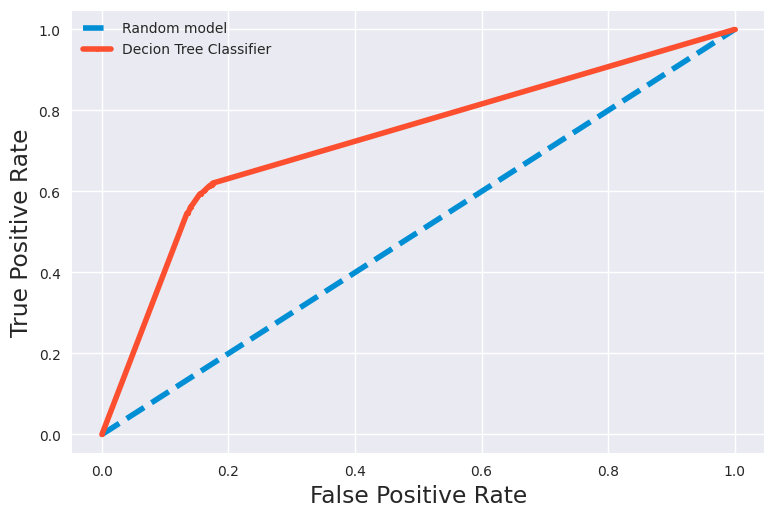

In [96]:
lr_auc_tree, lr_fpr_tree, lr_tpr_tree = drawRocCurve(clf, "Decion Tree Classifier", X_test, y_test)

KNeighborsClassifier:

model score: 0.820


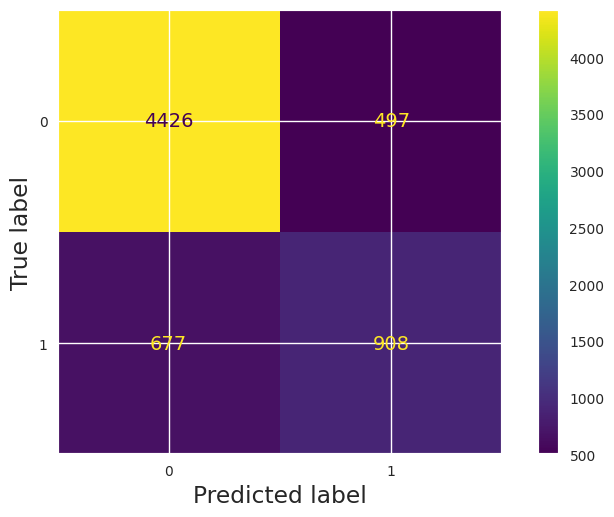

In [97]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',KNeighborsClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
KNeighboursClassifier: ROC AUC=0.843


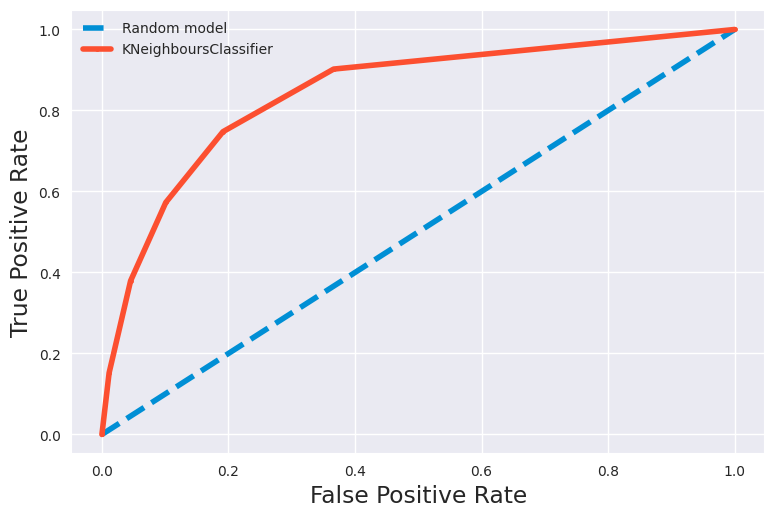

In [98]:
lr_auc_knc, lr_fpr_knc, lr_tpr_knc = drawRocCurve(clf, "KNeighboursClassifier", X_test, y_test)

GradientBoostingClassifier:

model score: 0.849


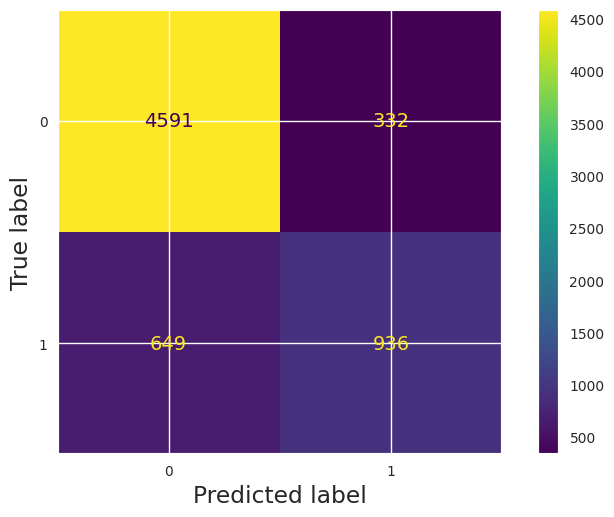

In [99]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',GradientBoostingClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
GradientBoostClassifier: ROC AUC=0.902


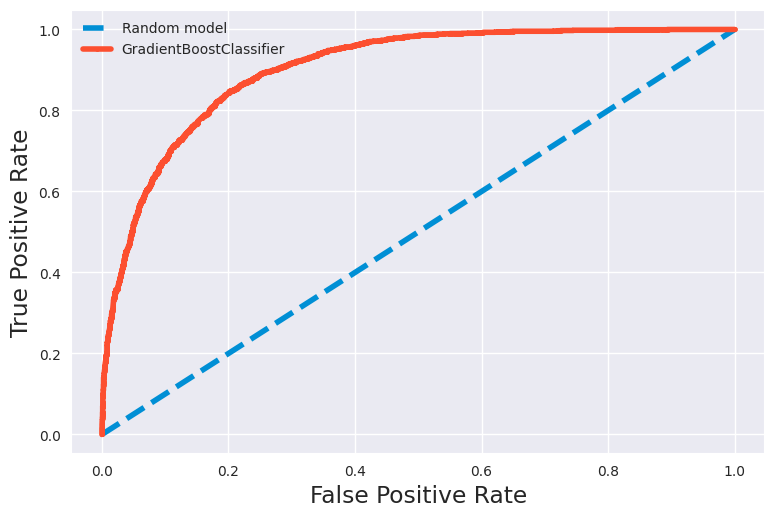

In [100]:
lr_auc_gbc, lr_fpr_gbc, lr_tpr_gbc = drawRocCurve(clf, "GradientBoostClassifier", X_test, y_test)

XGBClassifier:

model score: 0.839


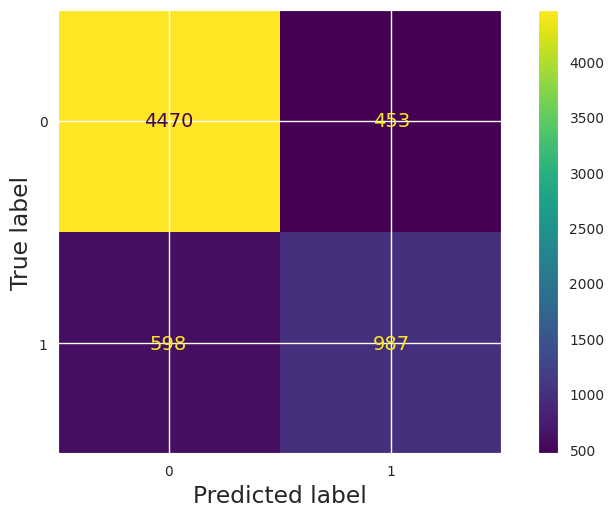

In [101]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
XGBClassifier: ROC AUC=0.893


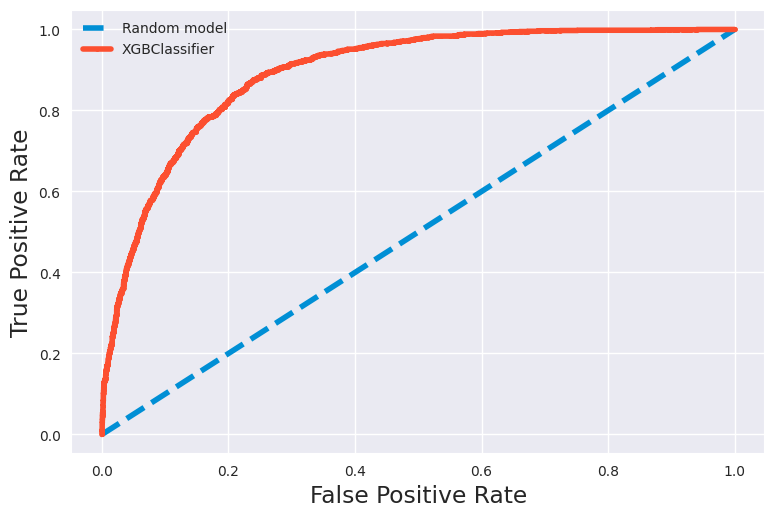

In [102]:
lr_auc_xgb, lr_fpr_xgb, lr_tpr_xgb = drawRocCurve(clf, "XGBClassifier", X_test, y_test)

AdaBoostClassifier:

model score: 0.848


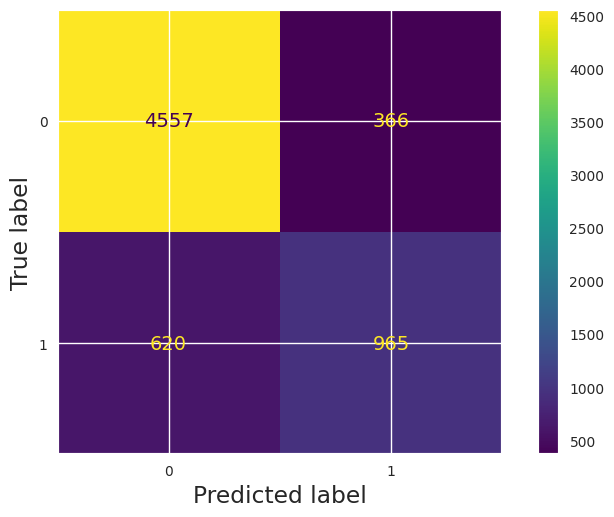

In [103]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',AdaBoostClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
AdaBoostClassifier: ROC AUC=0.901


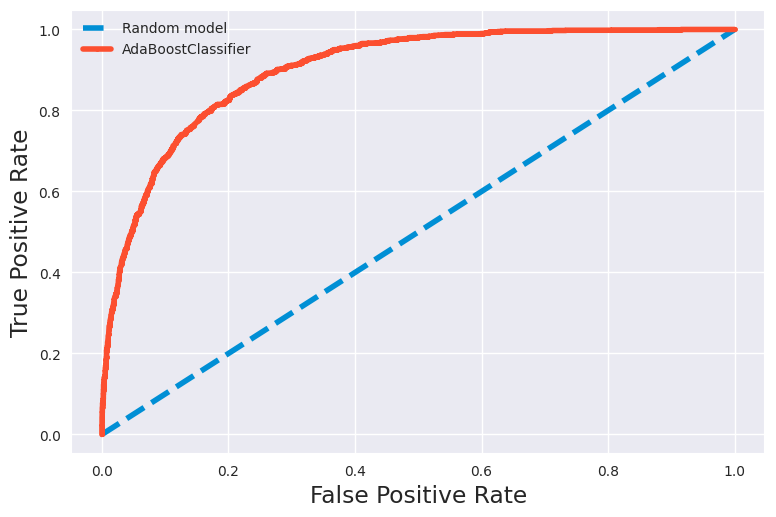

In [104]:
lr_auc_ada, lr_fpr_ada, lr_tpr_ada = drawRocCurve(clf, "AdaBoostClassifier", X_test, y_test)

CatBoostClassifier:

Learning rate set to 0.041432
0:	learn: 0.6570635	total: 56.5ms	remaining: 56.4s
1:	learn: 0.6254621	total: 64.6ms	remaining: 32.2s
2:	learn: 0.5965956	total: 72.8ms	remaining: 24.2s
3:	learn: 0.5713245	total: 81ms	remaining: 20.2s
4:	learn: 0.5453853	total: 88.7ms	remaining: 17.6s
5:	learn: 0.5236352	total: 96.7ms	remaining: 16s
6:	learn: 0.5069932	total: 105ms	remaining: 14.9s
7:	learn: 0.4887564	total: 113ms	remaining: 14.1s
8:	learn: 0.4737829	total: 122ms	remaining: 13.4s
9:	learn: 0.4600993	total: 131ms	remaining: 12.9s
10:	learn: 0.4474725	total: 139ms	remaining: 12.5s
11:	learn: 0.4387582	total: 148ms	remaining: 12.1s
12:	learn: 0.4297702	total: 156ms	remaining: 11.8s
13:	learn: 0.4229964	total: 164ms	remaining: 11.6s
14:	learn: 0.4170359	total: 176ms	remaining: 11.5s
15:	learn: 0.4108000	total: 189ms	remaining: 11.6s
16:	learn: 0.4057162	total: 201ms	remaining: 11.7s
17:	learn: 0.4010211	total: 210ms	remaining: 11.4s
18:	learn: 0.3972688	total: 218ms	remaining: 11.2s
19:	learn

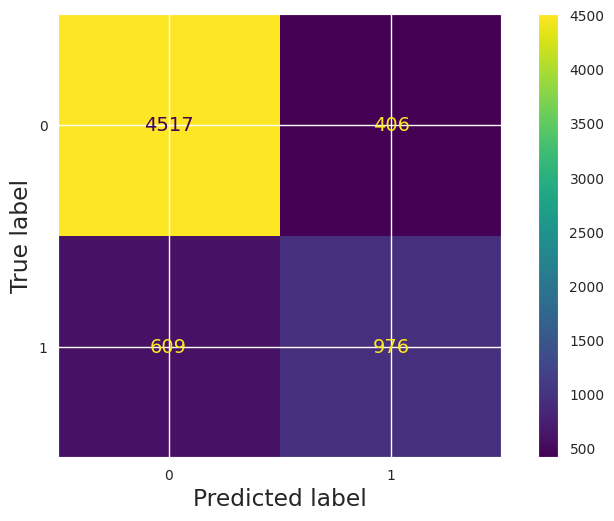

In [105]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',CatBoostClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
CatBoostClassifier: ROC AUC=0.902


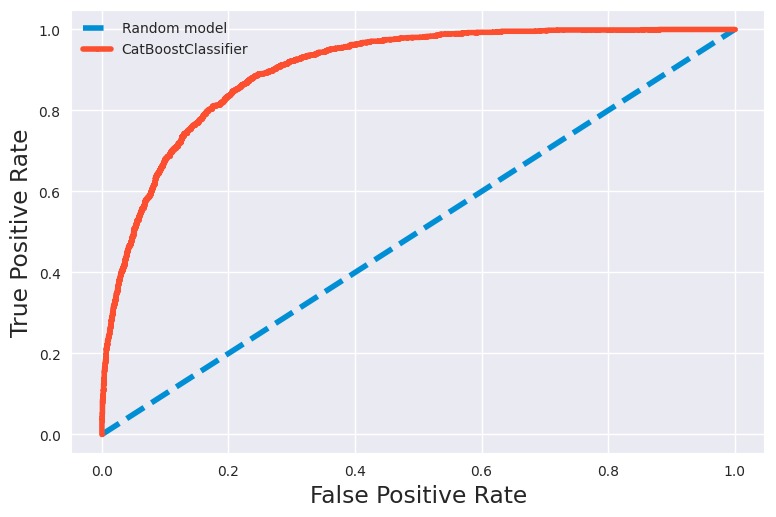

In [106]:
lr_auc_cat, lr_fpr_cat, lr_tpr_cat = drawRocCurve(clf, "CatBoostClassifier", X_test, y_test)

Overall Report

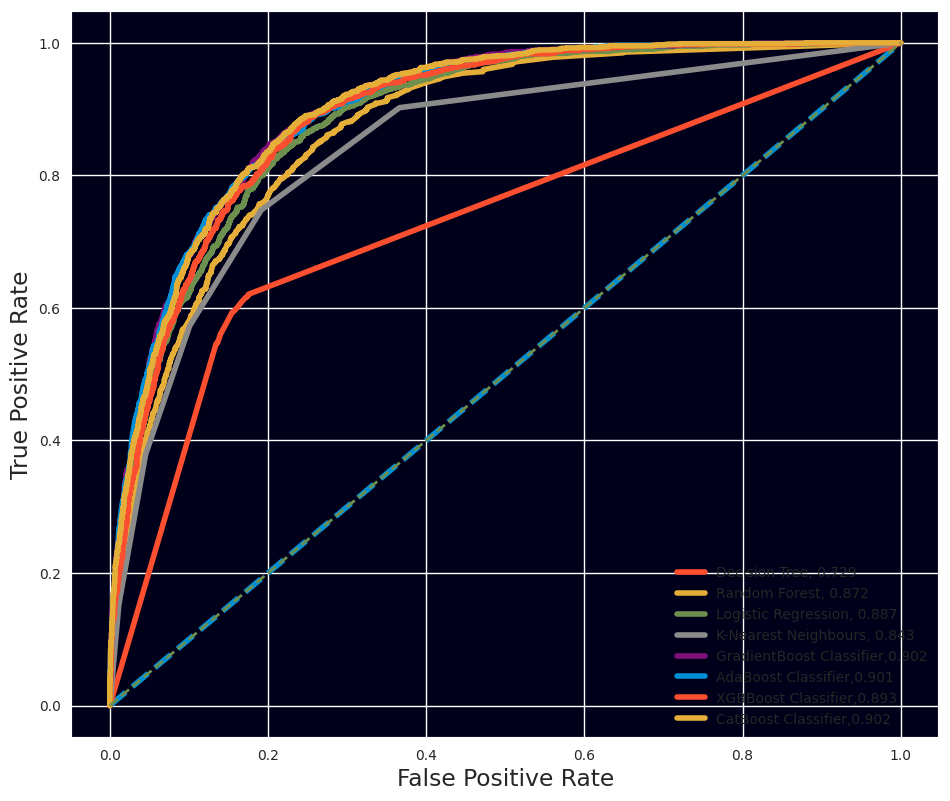

In [107]:
 # Determining the size of the drawing
fig, ax = plt.subplots(figsize=(10,9))
ax.set_facecolor((0,0,0.10))

#about Random model
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr_tree, lr_tpr_tree, label="Decision Tree, %.3f" % (lr_auc_tree))
plt.plot(lr_fpr_rf, lr_tpr_rf,  label="Random Forest, %.3f" % (lr_auc_rf))
plt.plot(lr_fpr_logr, lr_tpr_logr, label="Logistic Regression, %.3f" % (lr_auc_logr))
plt.plot(lr_fpr_knc, lr_tpr_knc, label="K-Nearest Neighbours, %.3f" % (lr_auc_knc))
plt.plot(lr_fpr_gbc,lr_tpr_gbc,label="GradientBoost Classifier,%.3f" %(lr_auc_gbc))
plt.plot(lr_fpr_ada,lr_tpr_ada,label="AdaBoost Classifier,%.3f" %(lr_auc_ada))
plt.plot(lr_fpr_xgb,lr_tpr_xgb,label="XGBBoost Classifier,%.3f" %(lr_auc_xgb))
plt.plot(lr_fpr_cat,lr_tpr_cat,label="CatBoost Classifier,%.3f" %(lr_auc_cat))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.savefig('ROC_ColumnTransformer.png')
# show the plot
plt.show()

In [108]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [109]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [110]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [111]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
     "XGBClassifier": XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Support Vector Classifier":SVC()
}

# EXPERIMENT 2: use of standard scaler and Simpleimputer with strategy most_frequent for categorical values 

In [112]:
numeric_transformer =Pipeline(steps=[
    ('standard_scaler',StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [113]:
X_scaled=preprocessor1.fit_transform(X)

In [114]:
smt=SMOTETomek(random_state=42,n_jobs=-1)

In [115]:
X_result2,y_result2=smt.fit_resample(X_scaled,y)

In [116]:
# Training all models
report_mean = evaluate_models(X_result2, y_result2, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9831
- F1 score: 0.9832
- Precision: 0.9795
- Recall: 0.9869
- Roc Auc Score: 0.9831
- COST: 130480.
----------------------------------
Model performance for Test set
- Accuracy: 0.8984
- F1 score: 0.8984
- Precision: 0.8843
- Recall: 0.9129
- Roc Auc Score: 0.8986
- COST: 211650.


Decision Tree
Model performance for Training set
- Accuracy: 0.9831
- F1 score: 0.9831
- Precision: 0.9897
- Recall: 0.9765
- Roc Auc Score: 0.9831
- COST: 228470.
----------------------------------
Model performance for Test set
- Accuracy: 0.8575
- F1 score: 0.8554
- Precision: 0.8546
- Recall: 0.8561
- Roc Auc Score: 0.8575
- COST: 347390.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8677
- F1 score: 0.8728
- Precision: 0.8434
- Recall: 0.9043
- Roc Auc Score: 0.8675
- COST: 955920.
----------------------------------
Model performance for Test set
- Accuracy: 0.8668
- F1 score: 0.8696
- Precision: 0.8389
- Recall: 0.90

In [117]:
report_mean

,Model Name,Cost
4,K-Neighbors Classifier,156600
6,CatBoosting Classifier,202520
0,Random Forest,211650
5,XGBClassifier,228590
2,Gradient Boosting,238700
8,Support Vector Classifier,251290
7,AdaBoost Classifier,271200
1,Decision Tree,347390
3,Logistic Regression,348540


# EXPERIMENT 3 :
    robust scaler and imputer with strategy =most_frequent

In [118]:
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [119]:
X_robust=preprocessor2.fit_transform(X)

In [120]:
X_result3,y_result3=smt.fit_resample(X_robust,y)

In [121]:
# Training all models
report2 = evaluate_models(X_result3, y_result3, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9829
- F1 score: 0.9829
- Precision: 0.9799
- Recall: 0.9859
- Roc Auc Score: 0.9829
- COST: 138880.
----------------------------------
Model performance for Test set
- Accuracy: 0.8952
- F1 score: 0.8953
- Precision: 0.8945
- Recall: 0.8960
- Roc Auc Score: 0.8952
- COST: 254570.


Decision Tree
Model performance for Training set
- Accuracy: 0.9829
- F1 score: 0.9828
- Precision: 0.9894
- Recall: 0.9762
- Roc Auc Score: 0.9829
- COST: 230510.
----------------------------------
Model performance for Test set
- Accuracy: 0.8676
- F1 score: 0.8668
- Precision: 0.8722
- Recall: 0.8614
- Roc Auc Score: 0.8676
- COST: 338560.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8702
- F1 score: 0.8741
- Precision: 0.8487
- Recall: 0.9010
- Roc Auc Score: 0.8702
- COST: 981360.
----------------------------------
Model performance for Test set
- Accuracy: 0.8668
- F1 score: 0.8714
- Precision: 0.8419
- Recall: 0.90

In [122]:
report2

,Model Name,Cost
4,K-Neighbors Classifier,196120
6,CatBoosting Classifier,220140
5,XGBClassifier,235580
8,Support Vector Classifier,240280
2,Gradient Boosting,240640
0,Random Forest,254570
7,AdaBoost Classifier,264900
3,Logistic Regression,332180
1,Decision Tree,338560


Obervation : Using XGBClassifier and CatBoostClasifier we can achieve almost same high accuracy for train and test dataset but CatboostClassifer costs more 

Lets do crossvalidation 

In [123]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

Overall Result After CrossValidation For (StandardScaler and Most_Frequent Strategy)

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X_result2,y_result2,test_size=0.2,random_state=0)

In [125]:
xgb=XGBClassifier()
cat=CatBoostClassifier()
rand=RandomForestClassifier()

In [126]:
print("Cross validation score for xgboost model==>",cross_val_score(xgb,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for Random Forest model==>",cross_val_score(rand,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for CatBoostClassifier",cross_val_score(cat,X_train,y_train,cv=5).mean())

Streaming output truncated to the last 5000 lines.
5:	learn: 0.5386468	total: 124ms	remaining: 20.6s
6:	learn: 0.5201901	total: 145ms	remaining: 20.5s
7:	learn: 0.5054231	total: 169ms	remaining: 21s
8:	learn: 0.4923669	total: 188ms	remaining: 20.7s
9:	learn: 0.4806447	total: 207ms	remaining: 20.5s
10:	learn: 0.4691424	total: 226ms	remaining: 20.3s
11:	learn: 0.4585170	total: 245ms	remaining: 20.2s
12:	learn: 0.4498441	total: 263ms	remaining: 20s
13:	learn: 0.4424842	total: 281ms	remaining: 19.8s
14:	learn: 0.4350771	total: 300ms	remaining: 19.7s
15:	learn: 0.4290112	total: 318ms	remaining: 19.6s
16:	learn: 0.4227911	total: 342ms	remaining: 19.8s
17:	learn: 0.4176436	total: 362ms	remaining: 19.7s
18:	learn: 0.4131798	total: 380ms	remaining: 19.6s
19:	learn: 0.4090172	total: 399ms	remaining: 19.6s
20:	learn: 0.4036589	total: 418ms	remaining: 19.5s
21:	learn: 0.3996582	total: 438ms	remaining: 19.5s
22:	learn: 0.3959921	total: 456ms	remaining: 19.4s
23:	learn: 0.3932176	total: 476ms	remain

In [127]:
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score

Overall Result After CrossValidation For (RobustScaler and  Strategy=constant)

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X_result1,y_result1,test_size=0.2,random_state=0)

In [129]:
xgb=XGBClassifier()
rand=RandomForestClassifier()
cat=CatBoostClassifier()

In [130]:
print("Cross validation score for xgboost model==>",cross_val_score(xgb,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for Random Forest model==>",cross_val_score(rand,X_train,y_train,cv=5).mean())
print("Cross validation score for catboost  model==>",cross_val_score(cat,X_train,y_train,cv=5).mean())

Streaming output truncated to the last 5000 lines.
5:	learn: 0.5323601	total: 120ms	remaining: 19.9s
6:	learn: 0.5169247	total: 142ms	remaining: 20.1s
7:	learn: 0.5019959	total: 164ms	remaining: 20.3s
8:	learn: 0.4886785	total: 183ms	remaining: 20.1s
9:	learn: 0.4775880	total: 201ms	remaining: 19.9s
10:	learn: 0.4657120	total: 221ms	remaining: 19.9s
11:	learn: 0.4565128	total: 241ms	remaining: 19.8s
12:	learn: 0.4467408	total: 262ms	remaining: 19.9s
13:	learn: 0.4388401	total: 282ms	remaining: 19.8s
14:	learn: 0.4321587	total: 302ms	remaining: 19.9s
15:	learn: 0.4259124	total: 324ms	remaining: 19.9s
16:	learn: 0.4198900	total: 344ms	remaining: 19.9s
17:	learn: 0.4136508	total: 365ms	remaining: 19.9s
18:	learn: 0.4093272	total: 384ms	remaining: 19.8s
19:	learn: 0.4050572	total: 403ms	remaining: 19.8s
20:	learn: 0.4007274	total: 423ms	remaining: 19.7s
21:	learn: 0.3969229	total: 446ms	remaining: 19.8s
22:	learn: 0.3936150	total: 465ms	remaining: 19.8s
23:	learn: 0.3910663	total: 484ms	re

Overall Result After CrossValidation For (RobustScaler and Most_Frequent Strategy)

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X_result3,y_result3,test_size=0.2,random_state=0)

In [132]:
xgb=XGBClassifier()
rand=RandomForestClassifier()
cat=CatBoostClassifier()

In [133]:
print("Cross validation score for xgboost model==>",cross_val_score(xgb,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for Random Forest model==>",cross_val_score(rand,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for CatBoostClassifier",cross_val_score(cat,X_train,y_train,cv=5).mean())

Streaming output truncated to the last 5000 lines.
5:	learn: 0.5389581	total: 126ms	remaining: 20.8s
6:	learn: 0.5232874	total: 146ms	remaining: 20.8s
7:	learn: 0.5076528	total: 166ms	remaining: 20.5s
8:	learn: 0.4943145	total: 185ms	remaining: 20.4s
9:	learn: 0.4830654	total: 204ms	remaining: 20.2s
10:	learn: 0.4721749	total: 223ms	remaining: 20s
11:	learn: 0.4612533	total: 242ms	remaining: 19.9s
12:	learn: 0.4518534	total: 261ms	remaining: 19.8s
13:	learn: 0.4434354	total: 288ms	remaining: 20.3s
14:	learn: 0.4359984	total: 309ms	remaining: 20.3s
15:	learn: 0.4299936	total: 333ms	remaining: 20.5s
16:	learn: 0.4232688	total: 354ms	remaining: 20.5s
17:	learn: 0.4187837	total: 372ms	remaining: 20.3s
18:	learn: 0.4138678	total: 391ms	remaining: 20.2s
19:	learn: 0.4090466	total: 410ms	remaining: 20.1s
20:	learn: 0.4042210	total: 429ms	remaining: 20s
21:	learn: 0.4005826	total: 447ms	remaining: 19.8s
22:	learn: 0.3973790	total: 465ms	remaining: 19.7s
23:	learn: 0.3947379	total: 482ms	remain

Conclusion :
  Above Experiments it is clear that we get best accuaray using Catboost Classifer 90% and is th bst algorithmn for this dataset 